# Prueba Intertrimestral

**Nombre:**  
**Apellidos:**  

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [71]:
import pandas as pd
import numpy as np
import sklearn.datasets

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix
)

from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression

# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [3]:
def imc (weight, height):
    imc = weight/(height**2)
    imc_redondeado = round(imc, 2)
    return imc_redondeado

b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [4]:
def saludable (imc):
    if imc < 18.5:
        return "Bajo peso"
    elif 18.5 <= imc < 24.9:
        return "Normal"
    elif 25 <= imc < 29.9:
        return "Sobrepeso"
    else:
        return "Obesidad"

c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [5]:
datos = [[40, 1.75], [80, 1.80], [60, 1.60], [90, 1.85], [50, 1.55], [100, 1.90], [110, 1.70], [120, 1.95], [60, 1.65], [70, 1.78]]
tabla = []
for fila in datos:
    peso = fila[0]
    altura = fila[1]
    imc_valor = imc(peso, altura)
    estado_salud = saludable(imc_valor)
    tabla.append([peso, altura, imc_valor, estado_salud])
imcData = pd.DataFrame(tabla, columns = ['peso', 'altura', 'imc', 'salud'])
imcData

,peso,altura,imc,salud
0,40,1.75,13.06,Bajo peso
1,80,1.80,24.69,Normal
2,60,1.60,23.44,Normal
3,90,1.85,26.30,Sobrepeso
4,50,1.55,20.81,Normal
5,100,1.90,27.70,Sobrepeso
6,110,1.70,38.06,Obesidad
7,120,1.95,31.56,Obesidad
8,60,1.65,22.04,Normal
9,70,1.78,22.09,Normal


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [6]:
class HealthTools():
    def __init__(self, altura, peso):
        df = pd.DataFrame ( columns = ['peso', 'altura', 'imc', 'salud'])

        self.altura = altura
        self.peso = peso
        self.df = df
       

    def imc (self):
        imc = self.peso/(self.altura**2)
        imc_redondeado = round(imc, 2)
        return imc_redondeado
    
    def saludable (self):
        if self.imc < 18.5:
            return "Bajo peso"
        elif 18.5 <= self.imc < 24.9:
            return "Normal"
        elif 25 <= self.imc < 29.9:
            return "Sobrepeso"
        else:
            return "Obesidad"

    def run(self):
        self.df = [self.peso, self.altura, self.imc(self), self.saludable(self)]



## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [7]:
df = pd.read_csv("Final_data.csv", encoding='ISO-8859-1')
lifeStyleData = df

print('Numero de filas: ', lifeStyleData.shape[0])
print ('Numero de columnas: ', lifeStyleData.shape[1])
lifeStyleData.head()

Numero de filas:  20000
Numero de columnas:  54


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [41]:

def describeData(dataFrame):
    print("Shape (filas, columnas):", dataFrame.shape)
    print("Valores nulos por columna:")
    print(dataFrame.isna().sum())
    print("Tipos de datos:")
    print(dataFrame.dtypes)
    total_na = dataFrame.isna().sum().sum()
    total_values = dataFrame.shape[0] * dataFrame.shape[1]
    print(f"Porcentaje total de valores nulos: {100 * total_na / total_values:.2f}%")
    
describeData(lifeStyleData)



Shape (filas, columnas): (19997, 54)
Valores nulos por columna:
Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0


c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [9]:
#Las lineas que parecen tener mas valores faltantes son:
#   Max_BPM
#   Avg_BPM 
#   cholesterol_mg 
#
#

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

In [37]:
# Filtrar solo columnas numéricas
df_num = lifeStyleData.select_dtypes(include=['number'])

# Calcular la correlación
print(df_num.corr())

# Mostrar el mapa de calor
import plotly.express as px
px.imshow(df_num.corr(), text_auto=True, color_continuous_scale='RdBu', title='Matriz de correlación')
 




                                     Age  Weight (kg)  Height (m)   Max_BPM  \
Age                             1.000000    -0.044170   -0.037019 -0.028832   
Weight (kg)                    -0.044170     1.000000    0.353906  0.066791   
Height (m)                     -0.037019     0.353906    1.000000 -0.014299   
Max_BPM                        -0.028832     0.066791   -0.014299  1.000000   
Avg_BPM                         0.039313     0.016498   -0.012197 -0.028090   
Resting_BPM                     0.013328    -0.033607    0.009877  0.035528   
Session_Duration (hours)       -0.025400    -0.002153    0.006842  0.009771   
Calories_Burned                -0.021436    -0.001862    0.009386  0.003083   
Fat_Percentage                 -0.025170     0.778880   -0.156490  0.071815   
Water_Intake (liters)           0.037602     0.397986    0.398071  0.041629   
Workout_Frequency (days/week)   0.007121    -0.003908    0.007430 -0.038403   
Experience_Level               -0.022504     0.01656

## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [47]:
#Variables elegidas: fat_percentage, calories, protein_per_kg, lean_mass_kg
df = lifeStyleData.dropna()

X = pd.DataFrame(data=df[['Fat_Percentage', 'Calories', 'protein_per_kg', 'lean_mass_kg']],
                 columns=['Fat_Percentage', 'Calories', 'protein_per_kg', 'lean_mass_kg'])
y = pd.DataFrame(data = df[['BMI']], columns = ['BMI'])

b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [48]:

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state = 123)

print(X_train)

       Fat_Percentage  Calories  protein_per_kg  lean_mass_kg
8263        30.287265    2879.0        1.094530     71.755318
15267       35.000000    3052.0        1.468431     71.240000
9581        24.718208    1695.0        1.638789     45.997175
6254        29.191083    1759.0        1.795764     41.118738
11929       33.840588    1840.0        1.701459     47.601697
...               ...       ...             ...           ...
7766        21.600172    1380.0        2.466551     36.095281
15380       27.752515    1562.0        1.798064     38.818573
17733       24.198288    1527.0        2.041182     42.335256
15728       23.627738    1676.0        2.035330     40.423838
19969       25.553567    2448.0        1.205999     64.038822

[13997 rows x 4 columns]


c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [49]:
reg = ElasticNet()
reg.fit(X_train,y_train)

#Modelo regresion pero no lineal

ElasticNet()

In [53]:
#Modelo regresion lineal

lm = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ("lm", LinearRegression()),
])

lm = lm.fit(X_train, y_train)

print("Variance explanation R^2 = {}".format(round(lm.score(X, y),2)))

y_pred = lm.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


Variance explanation R^2 = 0.87
Mean squared error: 5.83


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [55]:
rf = RandomForestRegressor().fit(X_train, y_train)

rf = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ("rf", RandomForestRegressor()),
])

rf = rf.fit(X_train, y_train)

print("Variance explanation R^2 = {}".format(round(rf.score(X, y),2)))
y_pred = rf.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))



c:\Users\marta\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\marta\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Variance explanation R^2 = 0.97
Mean squared error: 3.17


Tiene mejor rendimiento el random forest, ya que es capaz de predecir el modelo con una precision mayor que el otro ya que el R^2 es mayor

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [63]:
def bmiHealthy(bmi):
    if 18.5<bmi<24.9:
        return 1
    else:
        return 0
    
DatosNuevos = pd.DataFrame(data=df[['Fat_Percentage', 'Calories', 'protein_per_kg', 'lean_mass_kg', 'BMI']],
                 columns=['Fat_Percentage', 'Calories', 'protein_per_kg', 'lean_mass_kg', 'BMI'])

DatosNuevos["bmiHealthy"] = DatosNuevos["BMI"].apply(bmiHealthy)

DatosNuevos



,Fat_Percentage,Calories,protein_per_kg,lean_mass_kg,BMI,bmiHealthy
0,26.800377,1806.0,1.624789,47.777394,24.87,1
1,27.655021,1577.0,1.514093,40.809803,23.48,1
2,24.320821,1608.0,1.663445,44.635580,21.15,1
3,32.813572,2657.0,0.862017,63.007432,32.45,0
4,17.307319,1470.0,2.538153,43.347504,14.83,0
...,...,...,...,...,...,...
19995,27.505498,2627.0,0.954837,71.269345,27.23,0
19996,26.180562,2477.0,0.689060,65.049689,25.20,0
19997,23.331802,1425.0,2.105844,35.420708,16.57,0
19998,18.985868,1276.0,2.190745,35.889260,16.88,0


b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [68]:
DatosNuevos.dropna()
X1 = pd.DataFrame(data=DatosNuevos[['Fat_Percentage', 'Calories', 'protein_per_kg', 'lean_mass_kg']],
                 columns=['Fat_Percentage', 'Calories', 'protein_per_kg', 'lean_mass_kg'])
y1 = pd.DataFrame(data = DatosNuevos[['bmiHealthy']], columns = ['bmiHealthy'])

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 123)

clf_log = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ("glm", LogisticRegression(max_iter=10000, tol=0.1)),
])


clf_log.fit(X_train, y_train)

predictions = clf_log.predict(X_test)

c:\Users\marta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


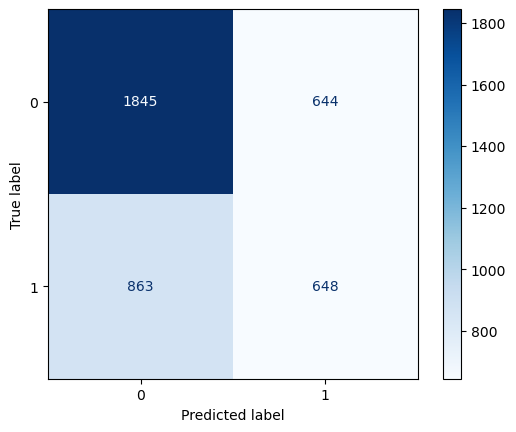

In [70]:

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Mostrarla de manera más visual
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_log.classes_)
disp.plot(cmap='Blues')


d) (0.75 pts) Explica qué variable parece influir más según el modelo.

In [69]:

coefs = clf_log.named_steps['glm'].coef_[0]
feature_importance = pd.Series(coefs, index=X1.columns).sort_values(key=abs, ascending=False)
print(feature_importance)


Fat_Percentage   -0.436219
Calories         -0.308773
lean_mass_kg     -0.215549
protein_per_kg    0.027235
dtype: float64


La variable que mas parece influenciar el modelo es Fat_percentage de manera negativa, es decir, cuanto más Fat_percentage tenga una persona, menor es la posibilidad de que tenga un bmiHealthy

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.



Parece ser que los datos que mas influencia tienen sobre el estado de salud son fat_percentage, calories, protein_per_kg, lean_mass_kg. Todo ello parece relacionado con los alimentos que ingiere una persona y la cantidad de grasas que estos contienen

El modelo mas eficaz es el ultimo realizado ya que no predice el bmi completo, simplemente es capaz de predecir si una persona tienen el bmi en unos varemos sanos. Por lo tanto es mucho mas eficaz que el resto

Si tuviera mas tiempo, un ordenador mas potente o unos datos mejores seria capaz de crear un modelo que tenga en cuenta todas las columnas y no unicamente aquellas que se relacionan de una manera mas directa. 